# Erasmus Neural Networks
http://michalbereta.pl/nn
## Basics of nonlinear models


## Before you start

Exacute the examples.

Then, do the tasks and send back the notebook.

Change the name of this notebook according to the schema: {YourSurname}\_{YourFirstName}\_{OriginalFileName}.

Be sure to fill all places with "YOUR ANSWER HERE".

When ready, send the notebook, with all the necessary files zipped, to the teacher.

### Regression for nonlinear data

In [ ]:
#!/usr/bin/env python
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.animation as animation

%matplotlib notebook

def fun1(x):
    return x**2
#    return np.sin(0.5*x) + np.sin(x + 2)


xmin = -6
xmax = 6

x = np.arange(xmin, xmax, 0.2)
print (x)

#real values of unknown process
d = fun1(x)

#training data with noise
sigma = 0.5
tr_d = d + np.random.randn(len(d)) * sigma

#plt.xlim(xmin,xmax)
#plt.ylim(ymin,ymax)

plt.plot(x, d)
plt.plot(x, tr_d, 'o')

plt.show()

### Extended representation for  regression problem

In [ ]:
#!/usr/bin/env python
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def fun1(x):
    return x**2
#    return np.sin(0.5*x) + np.sin(x + 2)


def add_attributes(x):
    temp = np.vstack((x, x**2))
    temp = np.vstack((np.ones(x.shape[0]),temp)).T
    return temp

xmin = -6
xmax = 6
#ymin = -6
#ymax = 6

x = np.arange(xmin, xmax, 0.2)

#real values of unknown process
d = fun1(x)

#training data with noise
sigma = 0.5
tr_d = d + np.random.randn(len(d)) * sigma

#plt.xlim(xmin,xmax)
#plt.ylim(ymin,ymax)

plt.figure()
plt.plot(x, d)
plt.plot(x, tr_d, 'o')

X = add_attributes(x)
#print (X.shape)
#print(X)

#weights for the neuron
w = np.dot(np.dot( np.linalg.inv( np.dot(X.T, X) ), X.T), tr_d)
print('w')
print(w)
print(w.shape)

#neuron responses
y = np.dot(X,w)
print(y.shape)
#print(y)
plt.plot(x, y, 'r')
plt.plot(x, y, 'rx')

#training error
tr_mse = np.dot((y - tr_d).T, (y - tr_d))
print('training mse = ', tr_mse)

x_test = np.arange(xmin, xmax, 0.3)
d_test = fun1(x_test)
X_Test = add_attributes(x_test)
y_test = np.dot(X_Test,w)
test_mse = np.dot((y_test - d_test).T, (y_test - d_test))
print('testing mse = ', test_mse)

plt.figure()
plt.plot(x_test, d_test)
plt.plot(x_test, y_test,'rx')

plt.show()

### Another example of extended representation in nonlinear regression problem

In [ ]:
#!/usr/bin/env python
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def fun1(x):
    #return x**2
    return np.sin(0.5*x) + np.sin(x + 2)
    

def add_attributes(x):
    temp = np.vstack((x, x**2))
    #temp = np.vstack((temp, x**3))
    #temp = np.vstack((temp, x**4))
    #temp = np.vstack((temp, x**5))
    #temp = np.vstack((temp, x**6))
    #temp = np.vstack((temp, x**7))
    #temp = np.vstack((temp, x**8))
    #temp = np.vstack((temp, x**9))
    #temp = np.vstack((temp, x**10))
    return np.vstack((np.ones(x.shape[0]),temp)).T

xmin = -6
xmax = 6
#ymin = -6
#ymax = 6

x = np.arange(xmin, xmax, 0.1)

#real values of unknown process
d = fun1(x)

#training data with noise
sigma = 0.05
tr_d = d + np.random.randn(len(d)) * sigma

#plt.xlim(xmin,xmax)
#plt.ylim(ymin,ymax)

plt.figure()
plt.plot(x, d)
plt.plot(x, tr_d, 'o')

X = add_attributes(x)
print (X.shape)
print('min=',np.min(X, axis=0))
print('max=',np.max(X, axis=0))


#weights for the neuron
w = np.dot(np.dot( np.linalg.inv( np.dot(X.T, X) ), X.T), tr_d)
print('w')
print(w)
print(w.shape)

#neuron responses
y = np.dot(X,w)
print(y.shape)
#print(y)
plt.plot(x, y, 'r')
plt.plot(x, y, 'rx')

#training error
tr_mse = np.dot((y - tr_d).T, (y - tr_d))
print('training mse = ', tr_mse)

x_test = np.arange(xmin, xmax, 0.3)
d_test = fun1(x_test)
X_Test = add_attributes(x_test)

y_test = np.dot(X_Test,w)
test_mse = np.dot((y_test - d_test).T, (y_test - d_test))
print('testing mse = ', test_mse)

plt.figure()
plt.plot(x_test, d_test)
plt.plot(x_test, y_test,'rx')

plt.show()

### Classification problem: two classes, no linear separability

#### Do not use this code for your implementation!

In [ ]:
#%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from time import time


train_data = np.loadtxt('data_2classes_nonlinear_2D.txt')
X = train_data[:,:-1]
d = train_data[:,-1]
num_of_inputs = X.shape[1]
print('Train data:')
print('Number of examples=',X.shape[0])
print('Number of inputs=',num_of_inputs)

num = X.shape[0]
X = np.hstack((np.repeat(1,num).reshape(num,1), X)) #adding bias signal


def perceptron(x, w):
    u = np.dot(x, w)
    y = 1 if u>0 else 0
    return y

epoch = 100
eta = 0.01

iteration = epoch*X.shape[0]

weights = np.random.random(3) #perceptoron weights
a = -weights[1]/weights[2]
b = -weights[0]/weights[2]

xx = np.linspace(0 ,1 ,100)
yy = a*xx+b


fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.scatter(X[d==0,1], X[d==0,2], color='r')
ax.scatter(X[d==1,1], X[d==1,2], color='g')
ax.plot(xx,yy, lw=2, c='k')

def animate(i):
    flag=False
    e, p = divmod(i,X.shape[0])
    global weights
    y = perceptron(X[p,:], weights)
    if y==1 and d[p]==0:
        flag = True
        weights -= eta*X[p,:]
    if y==0 and d[p]==1:
        flag=True
        weights += eta*X[p,:]
    if flag:
        a = -weights[1]/weights[2]
        b = -weights[0]/weights[2]
        yy = a*xx+b
        ax.clear()
        ax.scatter(X[d==0,1], X[d==0,2], color='r')
        ax.scatter(X[d==1,1], X[d==1,2], color='g')
        ax.scatter(X[p,1], X[p,2], color='k', s=80)
        ax.plot(xx,yy, lw=2, c='k')
        ax.text(0.0, -5.0, 'epoch: {0}, sample: {1}'.format(e,p))
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 1)
    return ax,

dt = 1./30
t0 = time()
animate(0)
t1 = time()
interval = 100 * dt - (t1 - t0)

anim = animation.FuncAnimation(fig, animate, frames=iteration, interval=interval)

plt.show()

### A reminder: Widrow-Hoff model for two classes (linear or close to linear separability)

In [ ]:
#!/usr/bin/env python
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.animation as animation

#example data from two classes, normal distributions
num = 100
x2 = np.random.multivariate_normal([-1,-1], np.array([[1,0],[0,1]]),num)
x1 = np.random.multivariate_normal([2,2], np.array([[1,0],[0,1]]),num)
xall = np.vstack((x1,x2))
labels = np.ones(num*2)
labels[num:] = -1.0

xmin = -6
xmax = 6
ymin = -6
ymax = 6

#weights initialization - random, small values, both positive and negative
#bias signal is connected with w[0]
w = 2*np.random.rand(3) - 1
print ('w=',w)


delta = 0.01 #grid accuracy for visualization
x = np.arange(xmin, xmax, delta)
y = np.arange(ymin, ymax, delta)
X, Y = np.meshgrid(x, y)
Z = X*w[1] + Y*w[2] + w[0]

fig = plt.figure()

plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.plot(x1[:,0],x1[:,1],'o')
plt.plot(x2[:,0],x2[:,1],'o')

print (xall.shape)
print (w[1:].shape)
print (w.shape)
#one iteration of learning algorithm
def update(i):
    global w
    print()
    print ('iteration=',i)

    #neuron resposnses for examples from both classes
    #we assume they should be 1 or -1 depending on te class
    ans = np.dot(xall, w[1:]) + w[0]  
    
    #mean squared error
    mse = np.sqrt(((ans - labels) * (ans - labels)).sum())
    print ('mse=',mse)

    errors = (ans[0:num] <= 0).sum() + (ans[num:] > 0).sum()
    print ('errors=',errors)
    
    #learning rate
    eta = 0.001
    #online learning
    #weights modification
    for k in range(num*2):
        w[1] += eta*(labels[k] - ans[k])*xall[k,0]
        w[2] += eta*(labels[k] - ans[k])*xall[k,1]
        w[0] += eta*(labels[k] - ans[k])*1.0  #bias weight modification        


    print ('w=',w)
    #vizualization
    plt.clf()
    plt.plot(x1[:,0],x1[:,1],'o')
    plt.plot(x2[:,0],x2[:,1],'o')
    Z = X*w[1] + Y*w[2] + w[0]
    Z[Z>0] = 1
    Z[Z<=0] = -1
    im = plt.imshow(Z, interpolation='bilinear', cmap=cm.hot,
                origin='lower', extent=[xmin, xmax, ymin, ymax],
                vmax=abs(Z).max(), vmin=-abs(Z).max())

    
#start of the algoirthm
ani = animation.FuncAnimation(fig, update, interval=1000, blit=False)
plt.show()

print ('end')

### Widrow-Hoff model (no linear separability)

In [ ]:
#!/usr/bin/env python
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.animation as animation


train_data = np.loadtxt('data_2classes_nonlinear_2D.txt')
X = train_data[:,:-1]
labels = train_data[:,-1]
labels[labels==0] = -1
num_of_inputs = X.shape[1]
print('Train data:')
print('Number of examples=',X.shape[0])
print('Number of inputs=',num_of_inputs)

xmin = 0
xmax = 1
ymin = 0
ymax = 1

#weights initialization - random, small values, both positive and negative
#bias signal is connected with w[0]
w = 2*np.random.rand(3) - 1
print ('w=',w)


delta = 0.005 #grid accuracy for visualization
x = np.arange(xmin, xmax, delta)
y = np.arange(ymin, ymax, delta)
XX, YY = np.meshgrid(x, y)
Z = XX*w[1] + YY*w[2] + w[0]

fig = plt.figure()

plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.plot(X[labels==-1,0],X[labels==-1,1],'o')
plt.plot(X[labels==1,0],X[labels==1,1],'o')


#one iteration of learning algorithm
def update(i):
    global w
    print()
    print ('iteration=',i)

    #neuron resposnses for examples from both classes
    #we assume they should be 1 or -1 depending on te class
    ans = np.dot(X, w[1:]) + w[0]  
    
    #mean squared error
    mse = np.sqrt(((ans - labels) * (ans - labels)).sum())
    print ('mse=',mse)

    errors = (ans[labels==1] <= 0).sum() + (ans[labels==-1] > 0).sum()
    print ('errors=',errors)
    
    #learning rate
    eta = 0.001
    #online learning
    #weights modification
    for k in range(X.shape[0]):
        w[1] += eta*(labels[k] - ans[k])*X[k,0]
        w[2] += eta*(labels[k] - ans[k])*X[k,1]
        w[0] += eta*(labels[k] - ans[k])*1.0  #bias weight modification        

    print ('w=',w)
    #vizualization
    plt.clf()
    plt.plot(X[labels==-1,0],X[labels==-1,1],'o')
    plt.plot(X[labels==1,0],X[labels==1,1],'o')
    Z = XX*w[1] + YY*w[2] + w[0]
    Z[Z>0] = 1
    Z[Z<=0] = -1
    plt.imshow(Z, interpolation='bilinear', cmap=cm.hot,
                origin='lower', extent=[xmin, xmax, ymin, ymax],
                vmax=abs(Z).max(), vmin=-abs(Z).max())

    
#start of the algoirthm
ani = animation.FuncAnimation(fig, update, interval=1000, blit=False)
plt.show()

print ('end')

### Widro-Hoff model for data with no linear separability - extending the representation with x^2

Example result:

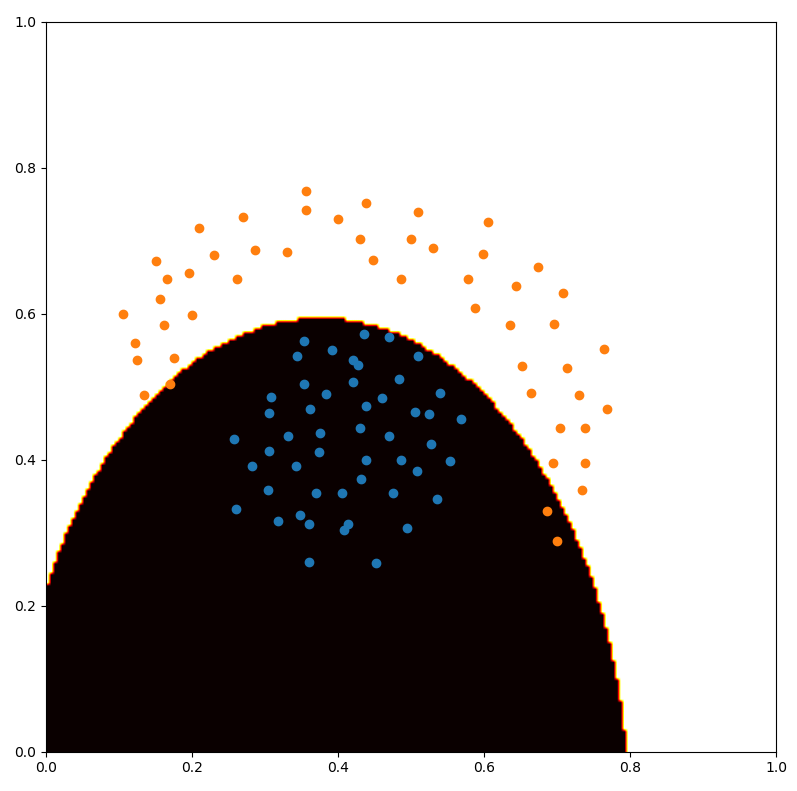

In [ ]:
#!/usr/bin/env python
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.animation as animation


train_data = np.loadtxt('data_2classes_nonlinear_2D.txt')
X = train_data[:,:-1]
labels = train_data[:,-1]
labels[labels==0] = -1
num_of_inputs = X.shape[1]
print('Train data:')
print('Number of examples=',X.shape[0])
print('Number of inputs=',num_of_inputs)

xmin = 0
xmax = 1
ymin = 0
ymax = 1

#we add x1^2 and x2^2 to the set of the original attributes; 
#our model is now nonlinear with respect to the attributes
#it is still linear with respect to weights
X2 = X*X 
X = np.hstack((X, X2))
#print xall

#weights initialization - random, small values, both positive and negative
#bias signal is connected with w[0]
w = 2*np.random.rand(5) - 1
print ('w=',w)


delta = 0.005 #grid accuracy for visualization
x = np.arange(xmin, xmax, delta)
y = np.arange(ymin, ymax, delta)
XX, YY = np.meshgrid(x, y)
Z = XX*w[1] + YY*w[2] + XX*XX*w[3] + YY*YY*w[4] + w[0]

fig = plt.figure()

plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.plot(X[labels==-1,0],X[labels==-1,1],'o')
plt.plot(X[labels==1,0],X[labels==1,1],'o')


#one iteration of learning algorithm
def update(i):
    global w
    print()
    print ('iteration=',i)

    #neuron resposnses for examples from both classes
    #we assume they should be 1 or -1 depending on te class
    ans = np.dot(X, w[1:]) + w[0]  
    
    #mean squared error
    mse = np.sqrt(((ans - labels) * (ans - labels)).sum())
    print ('mse=',mse)

    errors = (ans[labels==1] <= 0).sum() + (ans[labels==-1] > 0).sum()
    print ('errors=',errors)
    
    #learning rate
    eta = 0.01
    #online learning
    #weights modification
    for k in range(X.shape[0]):
        w[1:] += eta*(labels[k] - ans[k])*X[k,:]
        w[0] += eta*(labels[k] - ans[k])*1.0  #bias weight modification        
    print ('w=',w)
    #vizualization
    plt.clf()
    plt.plot(X[labels==-1,0],X[labels==-1,1],'o')
    plt.plot(X[labels==1,0],X[labels==1,1],'o')
    Z = XX*w[1] + YY*w[2] + XX*XX*w[3] + YY*YY*w[4] + w[0]
    Z[Z>0] = 1
    Z[Z<=0] = -1
    plt.imshow(Z, interpolation='bilinear', cmap=cm.hot,
                origin='lower', extent=[xmin, xmax, ymin, ymax],
                vmax=abs(Z).max(), vmin=-abs(Z).max())

    
#start of the algoirthm
ani = animation.FuncAnimation(fig, update, interval=1000, blit=False)
plt.show()

print ('end')

### ### Widrow-Hoff model for data with no linear separability - extending the representation with x^2 and x^3

Example result:

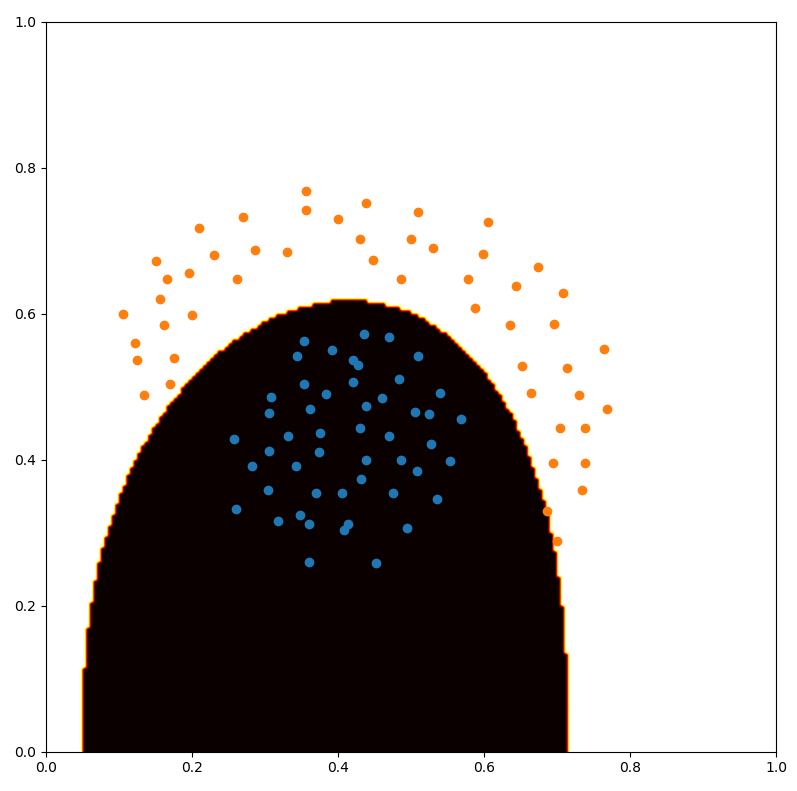

In [ ]:
#!/usr/bin/env python
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.animation as animation


train_data = np.loadtxt('data_2classes_nonlinear_2D.txt')
X = train_data[:,:-1]
labels = train_data[:,-1]
labels[labels==0] = -1
num_of_inputs = X.shape[1]
print('Train data:')
print('Number of examples=',X.shape[0])
print('Number of inputs=',num_of_inputs)

xmin = 0
xmax = 1
ymin = 0
ymax = 1

#we add x1^2 and x2^2 to the set of the original attributes; 
#our model is now nonlinear with respect to the attributes
#it is still linear with respect to weights
X2 = X*X 
X3 = X*X*X
X = np.hstack((X, X2,X3))
#print xall

#weights initialization - random, small values, both positive and negative
#bias signal is connected with w[0]
w = 2*np.random.rand(7) - 1
print ('w=',w)


delta = 0.005 #grid accuracy for visualization
x = np.arange(xmin, xmax, delta)
y = np.arange(ymin, ymax, delta)
XX, YY = np.meshgrid(x, y)
Z = XX*w[1] + YY*w[2] + XX*XX*w[3] + YY*YY*w[4] + XX*XX*XX*w[5] + YY*YY*YY*w[6] + w[0]

fig = plt.figure()

plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.plot(X[labels==-1,0],X[labels==-1,1],'o')
plt.plot(X[labels==1,0],X[labels==1,1],'o')


#one iteration of learning algorithm
def update(i):
    global w
    print()
    print ('iteration=',i)

    #neuron resposnses for examples from both classes
    #we assume they should be 1 or -1 depending on te class
    ans = np.dot(X, w[1:]) + w[0]  
    
    #mean squared error
    mse = np.sqrt(((ans - labels) * (ans - labels)).sum())
    print ('mse=',mse)

    errors = (ans[labels==1] <= 0).sum() + (ans[labels==-1] > 0).sum()
    print ('errors=',errors)
    
    #learning rate
    eta = 0.01
    #online learning
    #weights modification
    for k in range(X.shape[0]):
        w[1:] += eta*(labels[k] - ans[k])*X[k,:]
        w[0] += eta*(labels[k] - ans[k])*1.0  #bias weight modification        
    print ('w=',w)
    #vizualization
    plt.clf()
    plt.plot(X[labels==-1,0],X[labels==-1,1],'o')
    plt.plot(X[labels==1,0],X[labels==1,1],'o')
    Z = XX*w[1] + YY*w[2] + XX*XX*w[3] + YY*YY*w[4] + XX*XX*XX*w[5] + YY*YY*YY*w[6] + w[0]
    Z[Z>0] = 1
    Z[Z<=0] = -1
    plt.imshow(Z, interpolation='bilinear', cmap=cm.hot,
                origin='lower', extent=[xmin, xmax, ymin, ymax],
                vmax=abs(Z).max(), vmin=-abs(Z).max())

    
#start of the algoirthm
ani = animation.FuncAnimation(fig, update, interval=1000, blit=False)
plt.show()

print ('end')

### Overtrained model in case of simple data

Example result (not wanted!):

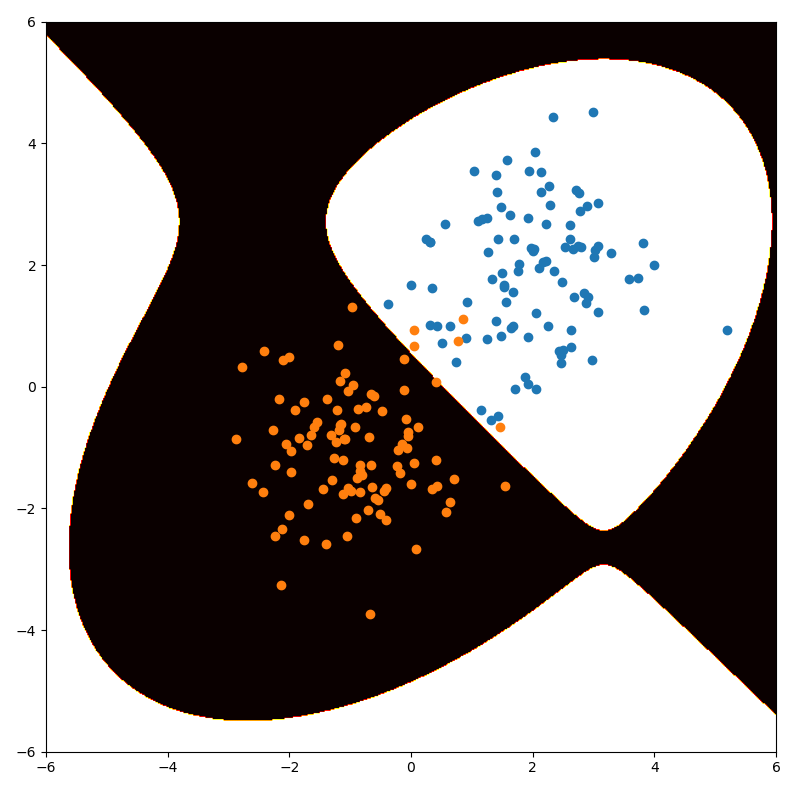

In [ ]:
#!/usr/bin/env python
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.animation as animation

#example data from two classes, normal distributions
num = 100
x2 = np.random.multivariate_normal([-1,-1], np.array([[1,0],[0,1]]),num)
x1 = np.random.multivariate_normal([2,2], np.array([[1,0],[0,1]]),num)
xall = np.vstack((x1,x2))
labels = np.ones(num*2)
labels[num:] = -1.0

xmin = -6
xmax = 6
ymin = -6
ymax = 6

#we add x1^2 and x2^2 to the set of the original attributes; 
#we add x1^3 and x2^3 to the set of the original attributes; 
#our model is now nonlinear with respect to the attributes
#it is still linear with respect to weights
xall2 = xall*xall
xall3 = xall*xall*xall
xall = np.hstack((xall, xall2,xall3))
print (xall)

#weights initialization - random, small values, both positive and negative
#bias signal is connected with w[0]
w = 2*np.random.rand(7) - 1
w/=1000
print (w)


delta = 0.02 #grid accuracy for visualization
x = np.arange(xmin, xmax, delta)
y = np.arange(ymin, ymax, delta)
X, Y = np.meshgrid(x, y)
Z = X*w[1] + Y*w[2] + X*X*w[3] + Y*Y*w[4] + X*X*X*w[5] + Y*Y*Y*w[6] + w[0]

fig = plt.figure()

plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.plot(x1[:,0],x1[:,1],'o')
plt.plot(x2[:,0],x2[:,1],'o')

print (xall.shape)
print (w[1:].shape)
print (w.shape)
#one iteration of learning algorithm
def update(i):
    global w
    print()
    print ('iteration=',i)

    #neuron resposnses for example from both classes
    #we assume they should be 1 or -1 depending on te class
    ans = np.dot(xall, w[1:]) + w[0]  
    
    #mean squared error
    mse = np.sqrt(((ans - labels) * (ans - labels)).sum())
    print ('mse=',mse)

    errors = (ans[0:num] <= 0).sum() + (ans[num:] > 0).sum()
    print ('errors=',errors)
    
    eta = 0.00001 #learning rate
    #online learning
    #weights modification
    for k in range(num*2):
        w[1:] += eta*(labels[k] - ans[k])*xall[k,:]
        w[0] += eta*(labels[k] - ans[k])*1.0  #bias weight modification
        
    print (w)
    #vizualization
    plt.clf()
    plt.plot(x1[:,0],x1[:,1],'o')
    plt.plot(x2[:,0],x2[:,1],'o')
    Z = X*w[1] + Y*w[2] + X*X*w[3] + Y*Y*w[4] + X*X*X*w[5] + Y*Y*Y*w[6] + w[0]
    Z[Z>0] = 1
    Z[Z<=0] = -1
    im = plt.imshow(Z, interpolation='bilinear', cmap=cm.hot,
                origin='lower', extent=[xmin, xmax, ymin, ymax],
                vmax=abs(Z).max(), vmin=-abs(Z).max())

    
#start of the algoirthm
ani = animation.FuncAnimation(fig, update, interval=10, blit=False)
plt.show()

print ('end')

### Activation functions in hidden layers

In [ ]:
#!/usr/bin/env python
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.animation as animation



xmin = -6
xmax = 6

x = np.arange(xmin, xmax, 0.01)

plt.figure()
plt.title('sigmoidal')
beta = 1.0
y = 1.0/(1.0 + np.exp(-beta*x))
plt.plot(x,y,'r')
beta = 2.0
y = 1.0/(1.0 + np.exp(-beta*x))
plt.plot(x,y,'g')
beta = 0.5
y = 1.0/(1.0 + np.exp(-beta*x))
plt.plot(x,y,'b')



plt.figure()
plt.title('tanh')
beta = 1.0
y = np.tanh(beta*x)
plt.plot(x,y,'r')
beta = 2.0
y = np.tanh(beta*x)
plt.plot(x,y,'g')
beta = 0.5
y = np.tanh(beta*x)
plt.plot(x,y,'b')


plt.figure()
plt.title('radial')
u = 0
sigma = 1
y = np.exp(-(u-x)**2/sigma)
plt.plot(x,y,'r')
u = 1
sigma = 4
y = np.exp(-(u-x)**2/sigma)
plt.plot(x,y,'g')
u = -1
sigma = 0.25
y = np.exp(-(u-x)**2/sigma)
plt.plot(x,y,'b')


plt.show()

### XOR problem - simple nonlinear classification problem with two classes

In [ ]:
#!/usr/bin/env python
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.animation as animation


xmin = -0.5
xmax = 1.5
ymin = -0.5
ymax = 1.5
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)


x = np.array([[0,0],[0,1],[1,0],[1,1]])
d = np.array([0,1,1,0])

print(x)
print(x.shape)

plt.figure()
plt.plot(x[0,0],x[0,1],'ro')
plt.plot(x[1,0],x[1,1],'bo')
plt.plot(x[2,0],x[2,1],'bo')
plt.plot(x[3,0],x[3,1],'ro')

plt.show()

### Solving XOR with two radial neurons in the hidden layer

In [ ]:
#!/usr/bin/env python
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.animation as animation


xmin = -0.5
xmax = 1.5
ymin = -0.5
ymax = 1.5
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)


delta = 0.01 #accuracy of the grid for vizualization only
_x = np.arange(xmin, xmax, delta)
_y = np.arange(ymin, ymax, delta)
X, Y = np.meshgrid(_x, _y)

#training data
x = np.array([[0,0],[0,1],[1,0],[1,1]])
d = np.array([0,1,1,0])

print('x, input\n',x)
print(x.shape)
print('\nd, required output\n',d)

#parameters of the radial neurons
u1 = np.array([0.0, 0.0])
sigma1 = 1.0
u2 = np.array([1.0, 1.0])
sigma2 = 1.0


#outputs of radial neurons (the hidden layer)
r1 = np.exp(-np.sum((u1-x)*(u1-x), axis=1)/sigma1**2)
print('\nr1 outputs', r1)
r2 = np.exp(-np.sum((u2-x)*(u2-x), axis=1)/sigma2**2)
print('r2 outputs', r2)

r = np.vstack((r1, r2, np.ones(4))).T
print('\ninputs to the linear neuron')
print(r)

#weights for the linear neuron (output layer)
w = np.dot(np.dot( np.linalg.inv( np.dot(r.T, r) ), r.T), d)
print('\nweights for the linear neuron (output layer)')
print(w)

#outputs of the network
print('\noutputs of the network')
print(np.dot(r,w))



#visualization
plt.figure()
plt.plot(x[0,0],x[0,1],'ro')
plt.plot(x[1,0],x[1,1],'bo')
plt.plot(x[2,0],x[2,1],'bo')
plt.plot(x[3,0],x[3,1],'ro')

shape_back = X.shape
grid = np.vstack((X.flat, Y.flat)).T

R1 = np.exp(-np.sum((u1-grid)*(u1-grid), axis=1)/sigma1)
R2 = np.exp(-np.sum((u2-grid)*(u2-grid), axis=1)/sigma2)

R1.shape = shape_back
R2.shape = shape_back


Z = R1*w[0] + R2*w[1] + w[2]
im = plt.imshow(Z, interpolation='bilinear', cmap=cm.hot,
            origin='lower', extent=[xmin, xmax, ymin, ymax],
            vmax=Z.max(), vmin=Z.min())
plt.colorbar()


#thresholded boudaries between classes
plt.figure()
plt.plot(x[0,0],x[0,1],'ro')
plt.plot(x[1,0],x[1,1],'bo')
plt.plot(x[2,0],x[2,1],'bo')
plt.plot(x[3,0],x[3,1],'ro')
Z[Z>0.5] = 1
Z[Z<=0.5] = -1
im = plt.imshow(Z, interpolation='bilinear', cmap=cm.hot,
            origin='lower', extent=[xmin, xmax, ymin, ymax],
            vmax=Z.max(), vmin=Z.min())

plt.show()

### Nonlinear regression with RBF network (fixed positions and parameters of the radial neurons)

In [ ]:
#!/usr/bin/env python
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def fun1(x):
    #return x**2
#    return np.sin(0.5*x) + np.sin(x + 2)
    return np.sin(0.5*x) + np.sin(x + 2) + np.cos(3*x)
    

xmin = -6
xmax = 6

x = np.arange(xmin, xmax, 0.1)

#real values of unknown process
d = fun1(x)

#training data with noise
sig = 0.05
tr_d = d + np.random.randn(len(d)) * sig

plt.figure()
plt.plot(x, d)
plt.plot(x, tr_d, 'o')


#parameters of radial neurons
sigma = 0.5 #for alll
#u = np.copy(x)
#u = xmin + np.random.rand(5)*(xmax - xmin)
u = np.arange(xmin, xmax, 0.6)
for _u in u:
    plt.plot(x, np.exp(-(x - _u)**2/sigma**2),'k')

#outputs of radial neurons (hidden layer)
R = np.empty([x.shape[0], u.shape[0] + 1])
print (R.shape)
print('R',R)
for i in range(x.shape[0]): #for each training example
    for j in range(u.shape[0]): #for each radial neuron
        R[i,j] = np.exp(-(u[j] - x[i])**2/sigma**2)
    R[i,-1] = 1.0

print('R',R, R.shape)

#weights for the neuron
w = np.dot(np.dot( np.linalg.inv( np.dot(R.T, R) ), R.T), tr_d)
print('w')
print(w)
print(w.shape)

#neuron responses
y = np.dot(R,w)
print(y.shape)
#print(y)
plt.plot(x, y, 'r')
plt.plot(x, y, 'rx')

#training error
tr_mse = np.dot((y - tr_d).T, (y - tr_d))
print('training mse = ', tr_mse)

plt.show()


### Task 1

#### Not obligatory to send this task!

Apply the MultiClass Perceptron model to a nonlinear classification problem with three classes. Use extended representation. 

- What representation is minimal and works with 0 classification error?

- Experiment with eta and max_epochs parameters.

Insert your code at the mark position in the script below.

This task can be solved with just one line of code!

If you apply your original data to the linear model, the result would be like this:

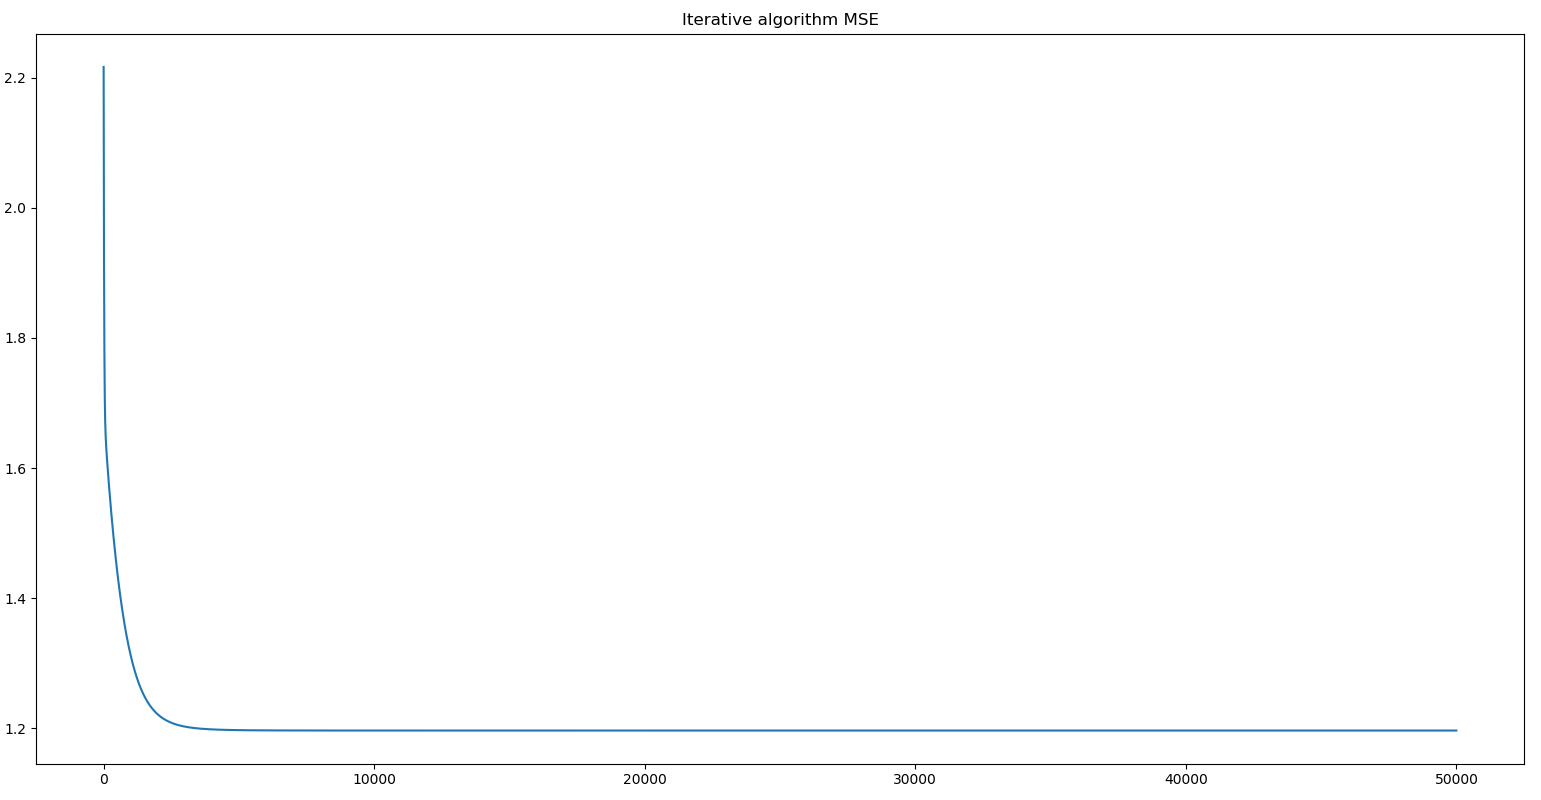

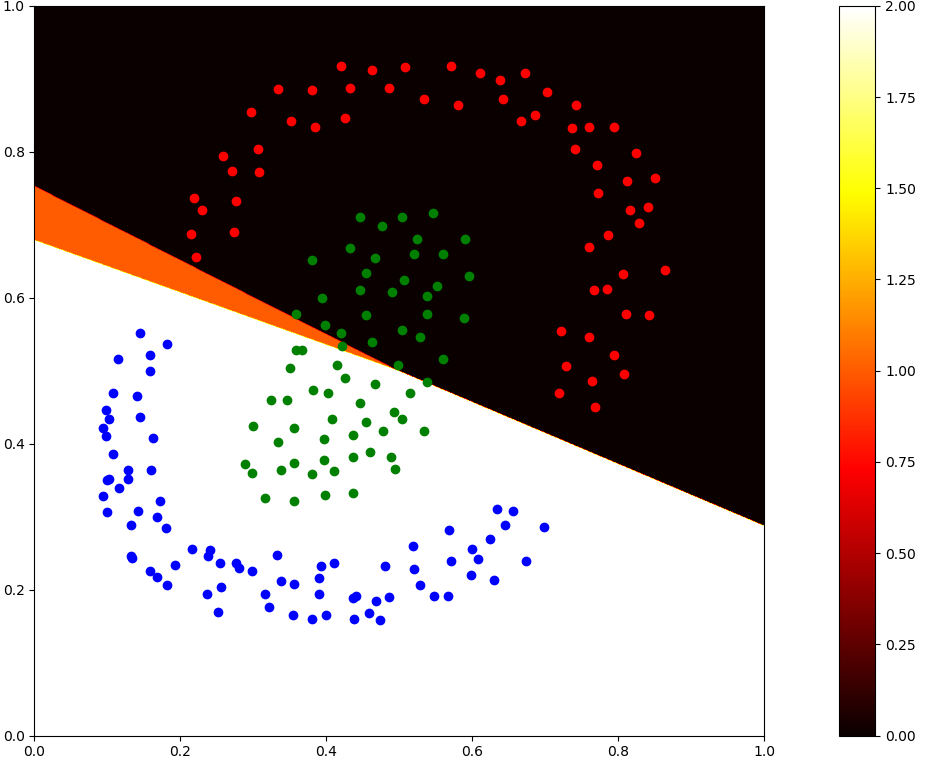

If you properly extend the data, the following results are possible:

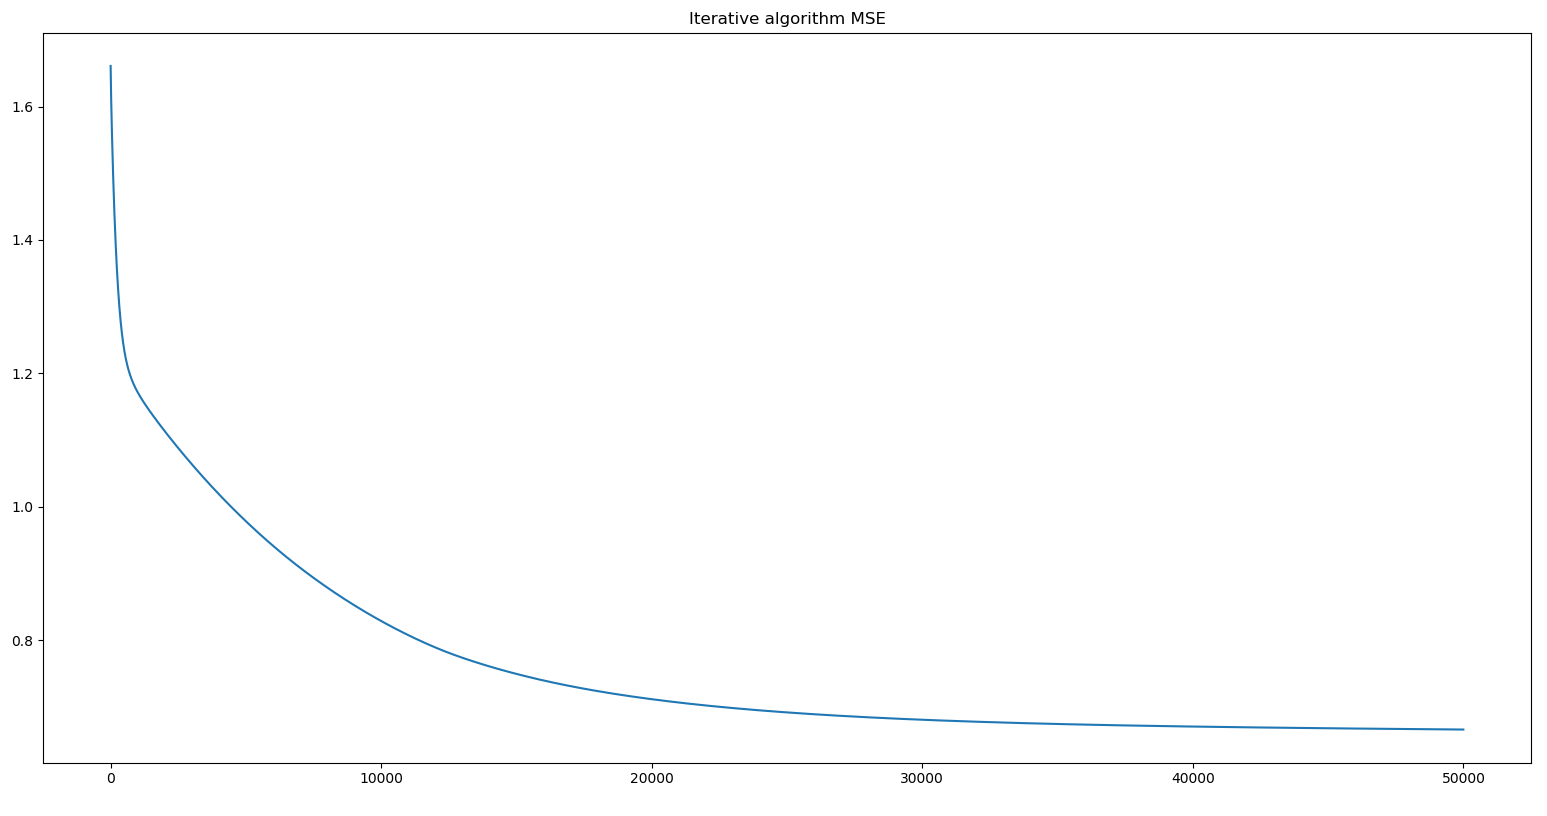

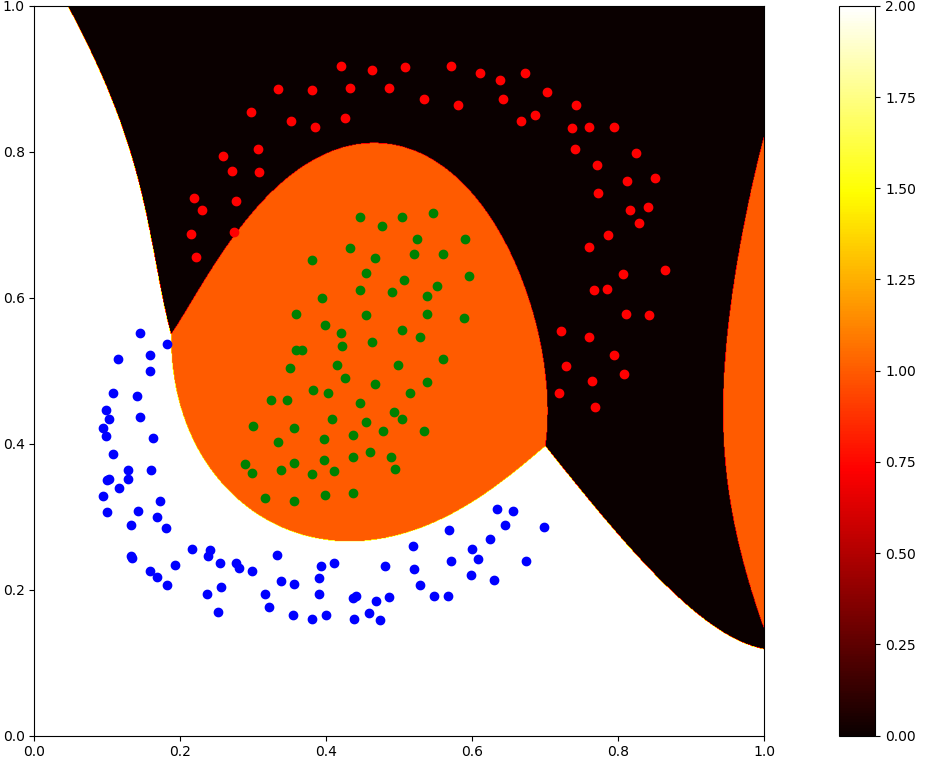

YOUR COMMENTS ON THE RESULTS HERE

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

class MCPerceptron:
    def __init__(self, num_of_classes, num_of_inputs):
        self.w =  -1 +2*np.random.rand(num_of_inputs, num_of_classes)  #neurons' weights as columns
        self.b = np.zeros(num_of_classes) #biases from all neurons
        self.outs = None
    def Forward(self, X):
        self.outs = np.dot(X, self.w) + self.b
        return self.outs
    def GetPredictions(self):
        return np.argmax(self.outs, axis=1)
    def GetMSE(self, d):
        self.mse = np.linalg.norm(self.outs - d, axis=1).sum()/d.shape[0]
        return self.mse
    def GetClassificationError(self, labels):
        return np.sum(labels!=self.GetPredictions())
    def Train(self, X, d): #matrix pseudo-inverse
        X = np.hstack((np.ones((X.shape[0],1)), X))
        w = np.dot(np.dot( np.linalg.inv( np.dot(X.T, X) ), X.T), d)
        self.w = w[1:,:]
        self.b = w[0,:]

    def TrainBatch(self, X, d, labels, eta, max_iters):
        Y = self.Forward(X)
        self.stats = []
        for i in range(max_iters):
            self.w += eta*np.dot(X.T, d - self.outs)
            self.b += eta*np.dot(np.ones((1,X.shape[0])), d - self.outs).flatten()
            Y = self.Forward(X)
            mse = self.GetMSE(d)
            self.stats.append(mse)
#            print('mse=',mse)
#            classification_error = self.GetClassificationError(labels)
#            print('classification_error=',classification_error)
#            print()


def encode_labels_as_binary(d, num_of_classes):
    rows = d.shape[0]
    labels = -1*np.ones((rows, num_of_classes), dtype='float32')
    labels[np.arange(rows),d.T] = 1
    return labels
    



X = np.loadtxt('data_3classes_nonlinear_2D.txt')
#print('X=',X)

d = X[:,-1].astype('int')
X = X[:,:-1]

plt.plot(X[d==0,0],X[d==0,1], 'ro')
plt.plot(X[d==1,0],X[d==1,1], 'go')
plt.plot(X[d==2,0],X[d==2,1], 'bo')
plt.show()

###############YOUR CODE GOES HERE START##########################
#extend data representation
##################################################################
#X = ....
###############YOUR CODE GOES HERE END##########################


num_of_cls = len(set(d))
num_of_ins = X.shape[1]

print('num_of_cls=',num_of_cls)
print('num_of_ins=',num_of_ins)

dtrain = encode_labels_as_binary(d, num_of_cls)
#print('dtrain=',dtrain)

perc = MCPerceptron(num_of_cls, num_of_ins)
print('w=',perc.w)
print('b=',perc.b)

Y = perc.Forward(X)
#print('Y=',Y)
predictions = perc.GetPredictions()
print('Predictions before training=',predictions)
print('MSE=',perc.GetMSE(dtrain))
print('classification errors=',np.sum(d!=predictions))


##########################################################################

perc.Train(X, dtrain)

Y = perc.Forward(X)
#print('Y=',Y)
predictions = perc.GetPredictions()
print()
print('Predictions after matrix pseudo inverse=',predictions)
print('MSE=',perc.GetMSE(dtrain))
print('classification errors=',np.sum(d!=predictions))
print('w=',perc.w)
print('b=',perc.b)

##########################################################################

print()
print('--iterative---')
perc2 = MCPerceptron(num_of_cls, num_of_ins)
perc2.TrainBatch(X, dtrain, d, 0.0001, 50000)
Y = perc2.Forward(X)
#print('Y=',Y)
predictions = perc2.GetPredictions()
print('Predictions after iterative training=',predictions)
print('MSE=',perc2.GetMSE(dtrain))
print('classification errors=',np.sum(d!=predictions))
print('w=',perc2.w)
print('b=',perc2.b)
print()


##########################################################################
plt.figure()

plt.plot(perc2.stats)

plt.title('Iterative algorithm MSE')
plt.show()
